# Creating an algorithm

In this notebook, we are going to explain how to implement a new optimization algorithm using the metaheuristic-designer framework.

For this example, we are going to implement a basic evolutionary strategy.

In [2]:
import random
import metaheuristic_designer as mhd
from metaheuristic_designer import GeneralAlgorithm
from metaheuristic_designer.selectionMethods import SurvivorSelection, ParentSelection
from metaheuristic_designer.operators import OperatorVector
from metaheuristic_designer.initializers import UniformVectorInitializer
from metaheuristic_designer.benchmarks import Sphere

As an example, we will choose to optimize the function `Square` that will calculate the sum of the squares of the components in the input. In this case, we will try to minimize this function 

In [4]:
# Initialization of the objective function
objfunc = Sphere(3)

For simplicity, we will assume we are working with real coded vectors.

To define a new search strategy we have a number of different options. The first one is instantiating the `SearchStrategy` class with the appropiate components, these will be an `Initializer`, an `Operator`, a `ParentSelection` method, a `SurvivorSelection` method, additionally, we can add a name to identify this strategy.

We will create a basic Evolutionary strategy (ES($\lambda$ + $\mu$)). This will inolve a random mutation, a parent selection method consisting on taking $\mu$ parents and a survivor selection method that will take the $\lambda$ best individuals resulting from the mutation of the parents. 

In [5]:
# Define the parameters of the algorithm
n_parents = 50
n_offspring = 250

# Instanciate the newly created algorithm
basic_ES_strategy = mhd.SearchStrategy(
    initializer=UniformVectorInitializer(objfunc.vecsize, objfunc.low_lim, objfunc.up_lim, pop_size=n_parents),
    operator=OperatorVector("MutRand", {"distrib": "Gauss", "F": 1e-3, "N": 1}),
    parent_sel=ParentSelection("Random", {"amount": n_offspring}),
    survivor_sel=SurvivorSelection("(m+n)"),
    name=f"BasicES({n_parents}+{n_offspring})"
)

To begin with the optimization we need one more component, the ```Algorithm```. This is mostly the same for all algorithms, so it is recomended that you use the already implemented ```GeneralAlgorithm``` class for this purpose unless you REALLY need something different. If this is the case, you have an ```Algorithm``` base class available that you can inherit from.

To instantiate the `GeneralAlgorithm` class we will need the objective function, the search strategy we just created and a dictionary with some parameters that determine the stopping condition of the algorithm.

In [ ]:
# Define the parameters of the optimization process
params = {"stop_cond": "time_limit", "time_limit": 100.0, "verbose": True, "v_timer": 2}

# Define a Search method
algorithm = GeneralAlgorithm(objfunc, basic_ES_strategy, params)

We then begin the optimization by calling the `optimize` method which will return the population on the last generation of the algorithm (`result`). To get the best solution, we will extract the best solution from the population by calling the `best_solution` method.

In [7]:
# Optimize the objective function
result = algorithm.optimize()
best_solution, best_fitness = result.best_solution()

Initializing optimization of Sphere function using BasicES(50+250)
------------------------------------------------------------------

Optimizing Sphere function using BasicES(50+250):
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 2539.774827507549
	Evaluations of fitness: 50


Optimizing Sphere function using BasicES(50+250):
	Real time Spent: 2.0 s
	CPU time Spent:  2.0 s
	Generation: 1177
	Best fitness: 2419.0084894938345
	Evaluations of fitness: 294300


Optimizing Sphere function using BasicES(50+250):
	Real time Spent: 4.0 s
	CPU time Spent:  4.0 s
	Generation: 2363
	Best fitness: 2300.014371226247
	Evaluations of fitness: 590800


Optimizing Sphere function using BasicES(50+250):
	Real time Spent: 6.0 s
	CPU time Spent:  6.0 s
	Generation: 3541
	Best fitness: 2186.2318273347237
	Evaluations of fitness: 885300


Optimizing Sphere function using BasicES(50+250):
	Real time Spent: 8.0 s
	CPU time Spent:  8.0 s
	Generation: 4719
	Best fitness: 2074.26

Best solution: [-7.76732177e-09 -8.71456517e-09  3.34844199e-08]
Solution fitness: 1.2574813082263717e-15

Number of generations: 59300
Real time spent: 100.00042s
CPU time spent: 99.83934s
Number of fitness evaluations: 14825050
Best fitness: 1.2574813082263717e-15


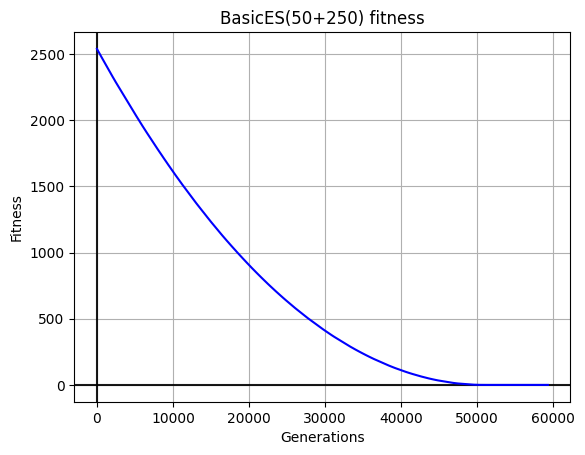

In [10]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
algorithm.display_report()